# Regresión lineal con Python y sklearn
_En este notebook presentamos un ejemplo de cómo hacer una regresión lineal utilizando el dataset de Car Price_

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# cargar el dataset 
rutadatasets = 'C:/proyectos/Master-IA-Unir/02-Aprendizaje-automatico/datasets/'
car_df = pd.read_csv(rutadatasets + 'CarPrice.csv')

In [6]:
# Mostrando las caracteristicas del dataset.
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
# funcion para  identifar las instancias y columnas del dataset.
car_df.shape

(205, 26)

**EDA**

Habría que hacer un análisis exploratorio de los datos en base a la tarea que tenemos que resolver.

_En el laboratorio  nos centraremos en explicar lo que es un EDA y cómo llevarlo a cabo_

Estamos viendo una regresión lineal simple, es decir vamos a realizar la predicción haciendo uso exclusivo de una variable independendiente.

In [10]:
car_df['enginesize']

0      130
1      130
2      152
3      109
4      136
      ... 
200    141
201    141
202    173
203    145
204    141
Name: enginesize, Length: 205, dtype: int64

In [11]:
df = car_df.filter(['enginesize','price'], axis=1)

In [12]:
df.head()

,enginesize,price
0,130,13495.0
1,130,16500.0
2,152,16500.0
3,109,13950.0
4,136,17450.0


In [13]:
from sklearn.model_selection import train_test_split

# Separamos los datos en conjunto de entrenamiento y conjunto de test (80/20)
X_train, X_test, y_train, y_test = train_test_split(df['enginesize'],df['price'],test_size=20, random_state=0)

In [18]:
X_train.shape

(185,)

In [19]:
X_train = X_train.values.reshape((-1, 1))
X_test = X_test.values.reshape((-1, 1))

In [20]:
# Creamos un objeto de Regresion lineal
regr = linear_model.LinearRegression()

In [21]:
# Entrenamos el modelo utilizando los datos de entrenamiento

regr.fit(X_train, y_train)

LinearRegression()

In [22]:
# Hacemos las predicciones utilizando los datos de test (datos no conocidos)
car_y_pred = regr.predict(X_test)

In [23]:
car_y_pred

array([ 7212.74357247, 19078.9021705 , 14840.98838549,  2127.24703046,
       10264.04149768, 16536.15389949,  7382.26012387,  7382.26012387,
       22469.23319851,  7382.26012387, 19587.4518247 , 26198.59732931,
        3652.89599306, 14501.95528269,  7043.22702107, 16536.15389949,
       14162.92217989, 14840.98838549, 10433.55804908,  7382.26012387])

In [24]:
y_test

52      6795.0
181    15750.0
5      15250.0
18      5151.0
188     9995.0
170    11199.0
76      5389.0
154     7898.0
104    17199.0
33      6529.0
12     20970.0
129    31400.5
55     10945.0
66     18344.0
45      8916.5
169     9989.0
130     9295.0
7      18920.0
37      7895.0
152     6488.0
Name: price, dtype: float64

In [25]:
# MSE, mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, car_y_pred))
# R2 - recordemos que 1 es la predicció perfecta
print("R2: %.2f" % r2_score(y_test, car_y_pred))

Mean squared error: 13636361.33
R2: 0.67


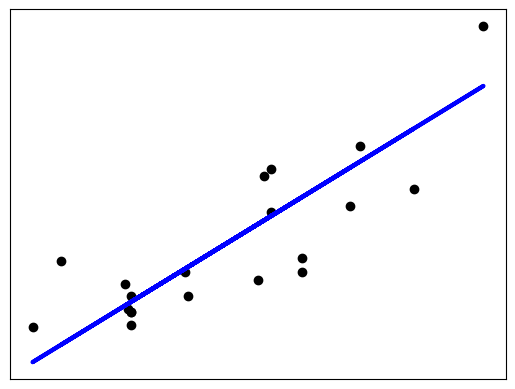

In [26]:
# Plot
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, car_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

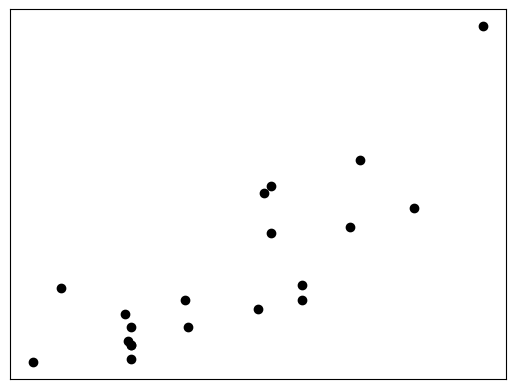

In [27]:
plt.scatter(car_y_pred, y_test, color="black")

plt.xticks(())
plt.yticks(())

plt.show()

## Ejercicio para practicar

**¿Hemos seguido las suposiciones de Regresión lineal?**

1. Features y target relación lineal.
   * Comprobar con un plot que la variable elegida se relaciona de manera lineal con la variable objetivo.
2. Variables independientes no correlacionadas.
   * Mapa de calor o distribución de correlaciones entre variables independientes.
3. Distribución normal de los residuos.
    * Comprobar con un plot que la diferencia entre los valores de test de la variable y los valores de predicción siguen(se asemejan) una distribución normal.
4. Homocedasticidad.
    * Hacer un plot de residuos vs predicción.
5. Autocorrelación
    * Durbin Watson test

**¿Mejoran los resultados con una regresión lineal múltiple?**



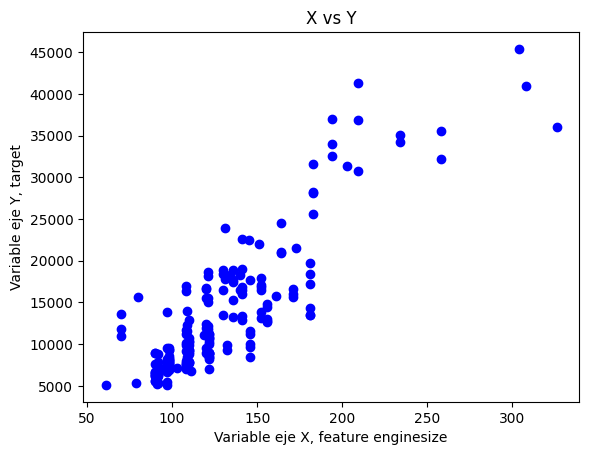

In [28]:
# para el número 1
plt.title("X vs Y")
plt.xlabel("Variable eje X, feature enginesize")
plt.ylabel("Variable eje Y, target")
plt.scatter(car_df['enginesize'], car_df['price'], color="blue", linewidth=1)
plt.show()

C:\Users\Oscar\AppData\Local\Temp\ipykernel_16940\3229110468.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(car_df.corr())


<Axes: >

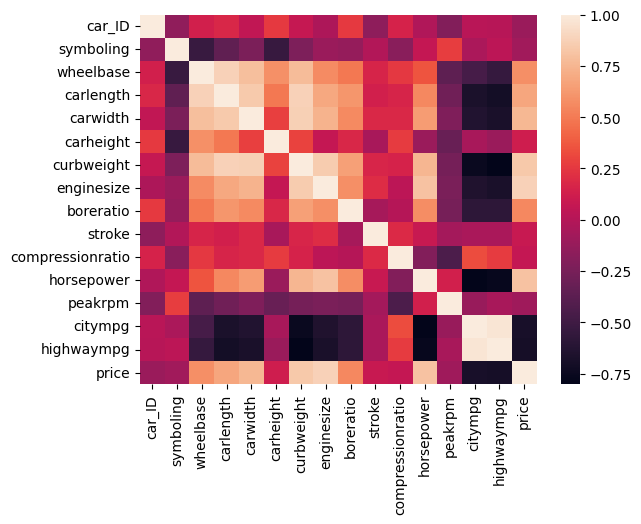

In [29]:
# para el número 2
import seaborn as sns # libreria seaborn https://seaborn.pydata.org/
sns.heatmap(car_df.corr())

C:\Users\Oscar\AppData\Local\Temp\ipykernel_16940\183613578.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual)


Text(0, 0.5, 'frequency')

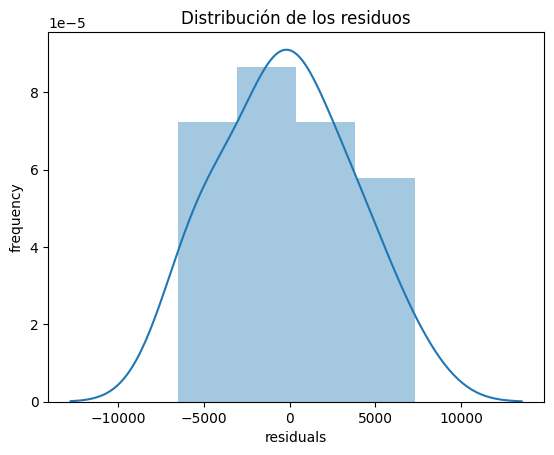

In [30]:
# para el número 3
residual = y_test - car_y_pred
sns.distplot(residual)
plt.title("Distribución de los residuos")
plt.xlabel("residuals")
plt.ylabel("frequency")

Text(0, 0.5, 'residuos')

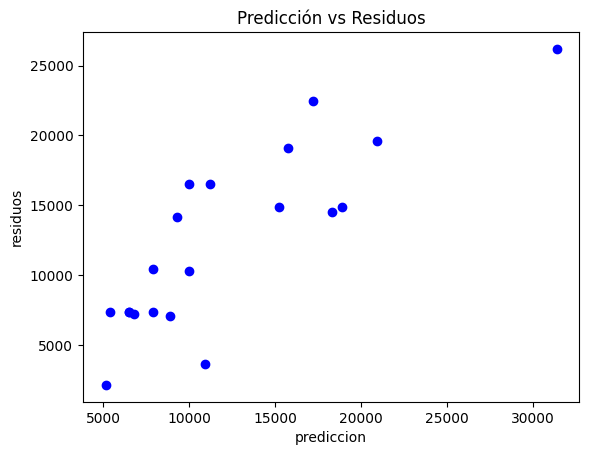

In [32]:
# para el número 4
plt.scatter(y_test, car_y_pred, color="blue", linewidth=1)
plt.title("Predicción vs Residuos")
plt.xlabel("prediccion")
plt.ylabel("residuos")

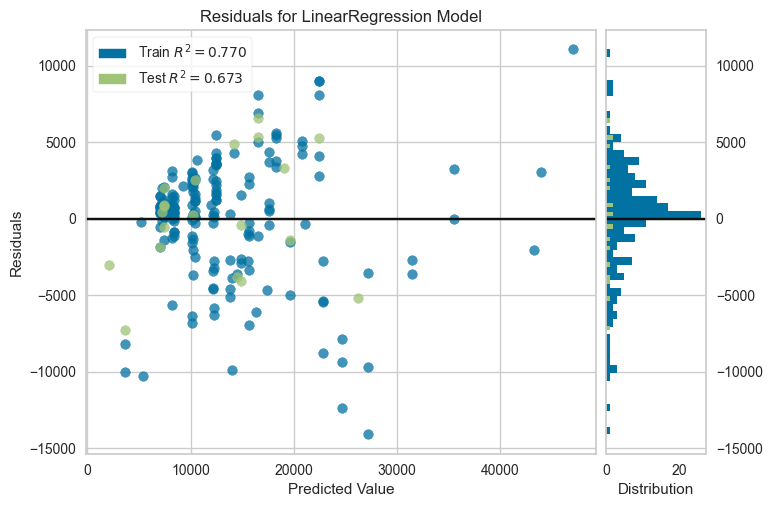

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [33]:
# otra manera
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(regr)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [34]:
# para el número 5
# pista a partir de lo ya calculado, sacar los residuos (y_test - y_pred)
from statsmodels.stats.stattools import durbin_watson

durbinWatson = durbin_watson(residual)
print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')


Durbin-Watson: 1.3796826164601126
Signs of positive autocorrelation 

Assumption not satisfied


**Regresión lineal múltiple**

In [29]:
# seleccionar solo las variables numéricas

In [35]:
car_df_x = car_df.drop(columns=['price'])

In [36]:
car_df_x = car_df_x.select_dtypes(include=np.number)

In [37]:
car_df_y = car_df['price']

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(car_df_x, car_df_y, test_size=0.20, random_state=42)

In [39]:
y_train

66     18344.0
111    15580.0
153     6918.0
96      7499.0
38      9095.0
        ...   
106    18399.0
14     24565.0
92      6849.0
179    15998.0
102    14399.0
Name: price, Length: 164, dtype: float64

In [40]:
regr = linear_model.LinearRegression()
# Entrenamos el modelo utilizando los datos de entrenamiento
regr.fit(X_train, y_train)
# Hacemos las predicciones utilizando los datos de test (datos no conocidos)
diabetes_y_pred = regr.predict(X_test)

In [41]:
# MSE, mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, diabetes_y_pred))
# R2 - recordemos que 1 es la predicció perfecta
print("R2: %.2f" % r2_score(y_test, diabetes_y_pred))

Mean squared error: 11710105.08
R2: 0.85
